In [ ]:
!pip install --upgrade google-api-python-client

     |████████████████████████████████| 8.4 MB 3.7 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.306 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.45.0 which is incompatible.


In [ ]:
from IPython.core.display import JSON
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
import json

In [ ]:
api_key = '<put your API KEY here>'
channels_ids =['UCV0qA-eDDICsRR9rPcnG7tw', 
              #  more channels here
               ]

In [ ]:
# we request for youtube api, for retriving youtube video data we will look at 3 modules
# Channels,playlistitems and videos
# we have the youtube channels, then we have upload playlist, then under upload playlist we have all videos

api_service_name = "youtube"
api_version = "v3"
# we are not doing user authentication but using developer key
# Get credentials and create an API client
youtube = build(
api_service_name, api_version, developerKey=api_key)

# ','.join(), concatinate all the channel ids together, you can add more channels ids to get the data from those channels,

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=','.join(channels_ids)
)
response = request.execute()
print(json.dumps(response, indent=5))

{
     "kind": "youtube#channelListResponse",
     "etag": "u8EoChAStde6uaCnrpq6gPoMqC8",
     "pageInfo": {
          "totalResults": 1,
          "resultsPerPage": 5
     },
     "items": [
          {
               "kind": "youtube#channel",
               "etag": "xhhNVMS1Zu1X_-TAHKozB-hNxVc",
               "id": "UCV0qA-eDDICsRR9rPcnG7tw",
               "snippet": {
                    "title": "Joma Tech",
                    "description": "I talk about life in Silicon Valley and at big tech companies.\n\nFollow me on:\nInstagram: http://instagram.com/jomaoppa\nTwitter: https://twitter.com/jomaoppa\n\nBusiness inquiries: business@joma.io\n",
                    "customUrl": "jomaoppa",
                    "publishedAt": "2016-08-31T22:22:07Z",
                    "thumbnails": {
                         "default": {
                              "url": "https://yt3.ggpht.com/ytc/AKedOLTFLnUPOScnD78_Lz7YCbp0PXSpPgBTI4HA0pA8=s88-c-k-c0x00ffffff-no-rj",
                         

<h1>Get Channel Statistics</h1>

In [ ]:
def get_channel_stats(youtube, channels_ids):
  all_data =[]
  Request = youtube.channels().list(
      part = "snippet,contentDetails,statistics",
      id =','.join(channels_ids)
  )
  response = request.execute()

   #loop through items in the file(json above) to get what data you need
  for item in response['items']:
     data = {
         'channelName': item['snippet']['title'],
         'subscribers': item['statistics']['subscriberCount'],
         'views':item['statistics']['viewCount'],
         'totalvideos': item['statistics']['videoCount'],
         'playlistId': item['contentDetails']['relatedPlaylists']['uploads']

     }

     all_data.append(data)

  return (pd.DataFrame(all_data))

In [ ]:
channel_stats = get_channel_stats(youtube, channels_ids)
channel_stats

,channelName,subscribers,views,totalvideos,playlistId
0,Joma Tech,1710000,124174527,99,UUV0qA-eDDICsRR9rPcnG7tw


<h2> Get Videos ids </h2>




In [ ]:
# Find the playlist_id value from channel stats table
playlist_id = "UUV0qA-eDDICsRR9rPcnG7tw" 


def get_video_ids(youtube, playlist_id):
  video_ids = []

  request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId = playlist_id,
            maxResults = 50
        )

  response = request.execute()

    # the maxResult are shown is 50, if you need to see all videoids use nextPageToken and while loop  
  for item in response['items']:
      video_ids.append(item['contentDetails']['videoId'])
        
  next_page_token = response.get('nextPageToken')
  while next_page_token is not None:
      request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
      response = request.execute()

      for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

      next_page_token = response.get('nextPageToken')
        
  print(json.dumps(response, indent = 5))
  return video_ids



In [ ]:
video_ids = get_video_ids (youtube, playlist_id)

{
     "kind": "youtube#playlistItemListResponse",
     "etag": "si3XFV-9VwA-olQXHQ1mUQwAsTs",
     "prevPageToken": "EAEaBlBUOkNESQ",
     "items": [
          {
               "kind": "youtube#playlistItem",
               "etag": "TR9R5aNTDVwwYlFFcLJMgO0f4H0",
               "id": "VVVWMHFBLWVERElDc1JSOXJQY25HN3R3LllHZmxIajFTakE0",
               "contentDetails": {
                    "videoId": "YGflHj1SjA4",
                    "videoPublishedAt": "2019-03-30T23:55:19Z"
               }
          },
          {
               "kind": "youtube#playlistItem",
               "etag": "SwMDkLq71jWttC2tXc-98s3PFbw",
               "id": "VVVWMHFBLWVERElDc1JSOXJQY25HN3R3LmhRX09QOGhfOWRR",
               "contentDetails": {
                    "videoId": "hQ_OP8h_9dQ",
                    "videoPublishedAt": "2019-03-26T19:24:33Z"
               }
          },
          {
               "kind": "youtube#playlistItem",
               "etag": "ODt4JNFblfQ55oelD5XXapxS8Mk",
               "

In [ ]:
video_ids

['KHEZCXfyxjU',
 '314OLE6mKOo',
 'JgdP7oWP0_0',
 'JwjwnSdI4Yw',
 'oCqkVZVPOe8',
 'k9JFitrgGgs',
 'TLysAkFM4cA',
 'YBYI7E2PqWE',
 '7ZcmboYbNPQ',
 '1fPWr0d5zBE',
 'lpcpsCY4Mco',
 'Hv6EMd8dlQk',
 'Rgx8dpiPwpA',
 'Nb5yppVh_4A',
 '-UdWguw90g4',
 'X34ZmkeZDos',
 'qiE7VKRHSsA',
 'sW9npZVpiMI',
 '0oBi8OmjLIg',
 'Z0N7vqSgRBY',
 'OTfp2_SwxHk',
 '0KmUoTfGa34',
 'vT3GUKuAzIs',
 'pKO9UjSeLew',
 'rR4n-0KYeKQ',
 'HTXTVfBCeSY',
 'pvimAM_SLic',
 'jlieOSX3GyM',
 '1stFeRlvicI',
 '4cDCl4cS5xY',
 'vmYaAzbv9xk',
 'uHt01D6rOLI',
 'fB7nyxXaczY',
 'rtuKId76DZI',
 'F4rykKLcduI',
 'K7s1IYVfvSA',
 'gvAF9mboxFM',
 'FqBvTFhS1ig',
 'm-zxHw2AiY0',
 'uxRf7KS3abo',
 'Pb3AAfz5Yjg',
 '9yUgUsAJ6nc',
 '_ybAyWUr3gI',
 'DFDGHEzf5oE',
 'LLyd-bqLnu8',
 'uBaU-n77B2Q',
 '_X223QGcJ_w',
 'uGX03-xUok8',
 'M5v1nXiUaOI',
 '0CxSvqyEjNE',
 'YGflHj1SjA4',
 'hQ_OP8h_9dQ',
 'd0pBDqGIDPM',
 'Y_ZZv--OI0s',
 'EiKK04Ht8QI',
 'k2RqjYCTt6k',
 'OHviieMFY0c',
 'ivvWyIscEt0',
 'tgOLVIiI8WY',
 'Ck0ozfJV9-g',
 'ilTczNXeFDI',
 'y4an6a7A6g8',
 'LOplxm

In [ ]:
len(video_ids)

99

In [ ]:
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [ ]:
video_df = get_video_details(youtube,video_ids)


In [ ]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,KHEZCXfyxjU,Joma Tech,if Wolf of Wall Street were about crypto,👾 Join the discord for more updates on the liv...,"[joma, vlog]",2022-04-08T15:00:28Z,578444,33855,None,1984,PT5M12S,hd,true
1,314OLE6mKOo,Joma Tech,interviewing at a startup be like... (ft. Stev...,Looking for a Software Engineering job? Curren...,"[joma, vlog]",2022-03-10T16:11:21Z,1170611,57027,None,3353,PT8M22S,hd,true
2,JgdP7oWP0_0,Joma Tech,every NFT project be like...,"If you want to be featured in my videos, you c...","[joma, vlog]",2022-02-19T14:54:12Z,554664,33330,None,1668,PT3M56S,hd,false
3,JwjwnSdI4Yw,Joma Tech,"We raised $234,080 in 30 seconds with NFTs! Th...","Again, thank you so much to everyone who minte...","[joma, vlog]",2022-02-03T00:00:29Z,375124,20727,None,1721,PT1M50S,hd,false
4,oCqkVZVPOe8,Joma Tech,crypto traders be like...,"If you want to be featured in my videos, you c...","[joma, vlog]",2022-01-29T14:36:05Z,1176516,67176,None,4077,PT6M44S,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,hGDJkqESz0k,Joma Tech,Bitcoin Millionaire Pitches His Startup Idea,Startup Episode 2\nNext Episode: https://www.y...,"[joma, startup, vlog, startup pitch, pitching ...",2018-01-02T00:00:00Z,809977,20175,None,913,PT12M14S,hd,true
95,GXKI84KKVI8,Joma Tech,How I Got An Internship At Citadel,🐶 Join my Crypto Discord Server and be part of...,"[joma, internship citadel, job citadel, intern...",2017-12-23T18:58:37Z,210175,4273,None,217,PT12M6S,hd,false
96,t6lBeG5QaC4,Joma Tech,Interview with an iOS Engineer (ft. Mayuko),🐶 Join my Crypto Discord Server and be part of...,"[joma, ios engineer, ios engineer interview, m...",2017-12-07T20:00:02Z,719122,13932,None,678,PT20M54S,hd,false
97,02AXP5eI6PE,Joma Tech,How I Landed My First Engineering Internship,🐶 Join my Crypto Discord Server and be part of...,"[joma, engineering internship, software engine...",2017-10-10T07:56:45Z,278030,6817,None,319,PT13M59S,hd,true


<h2>Get Comments for each videa <h3>(if you need)</h3>

In [ ]:
def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)
  

In [ ]:
comment_df = get_comments_in_videos(youtube,video_ids)
comment_df

Could not get comments for video Z0N7vqSgRBY


,video_id,comments
0,KHEZCXfyxjU,"[Don't fully understand the video? No worries,..."
1,314OLE6mKOo,[I cut a lot of the jokes out cause it got too...
2,JgdP7oWP0_0,[Join my discord so you can get berated by me:...
3,JwjwnSdI4Yw,"[so happy for you Joma!, greedy fuck, Can't wa..."
4,oCqkVZVPOe8,[🐶 This project was supported by my NFT projec...
...,...,...
93,hGDJkqESz0k,"[Its tiktok guys. Joma was right...., You shou..."
94,GXKI84KKVI8,[bro you went to waterloo... if yall don't kno...
95,t6lBeG5QaC4,[Slav tracksuit...barefoot...fuck sakes man......
96,02AXP5eI6PE,[Don't lie on your CV. It is actually fraudule...


<h2>Analysis Section</h2>


*   Views per video
*   Likes and comments vs views
*   Title length views
*   video duration
*   Video upload schedules







**<h1>Data Pre_processing</h1>**

In [ ]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [ ]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [ ]:
# as above all columns are object format so doesnt make sense for interger column like count,...
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors ='coerce', axis = 1)

In [ ]:
# publish day in the week
from dateutil import parser
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishedDayName'] = video_df['publishedAt'].apply(lambda x:x.strftime("%A"))

In [ ]:
video_df[['publishedAt','publishedDayName']]

,publishedAt,publishedDayName
0,2022-04-08 15:00:28+00:00,Friday
1,2022-03-10 16:11:21+00:00,Thursday
2,2022-02-19 14:54:12+00:00,Saturday
3,2022-02-03 00:00:29+00:00,Thursday
4,2022-01-29 14:36:05+00:00,Saturday
...,...,...
94,2018-01-02 00:00:00+00:00,Tuesday
95,2017-12-23 18:58:37+00:00,Saturday
96,2017-12-07 20:00:02+00:00,Thursday
97,2017-10-10 07:56:45+00:00,Tuesday


In [ ]:
!pip install isodate
import isodate

In [ ]:
# format of duration column
video_df ['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
# here the time is changed to just seconds
video_df ['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [ ]:
video_df[['durationSecs','duration']]

,durationSecs,duration
0,312.0,PT5M12S
1,502.0,PT8M22S
2,236.0,PT3M56S
3,110.0,PT1M50S
4,404.0,PT6M44S
...,...,...
94,734.0,PT12M14S
95,726.0,PT12M6S
96,1254.0,PT20M54S
97,839.0,PT13M59S


In [ ]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [ ]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDayName,durationSecs,tagCount
0,KHEZCXfyxjU,Joma Tech,if Wolf of Wall Street were about crypto,👾 Join the discord for more updates on the liv...,"[joma, vlog]",2022-04-08 15:00:28+00:00,578444.0,33855.0,NaN,1984.0,PT5M12S,hd,true,Friday,312.0,2
1,314OLE6mKOo,Joma Tech,interviewing at a startup be like... (ft. Stev...,Looking for a Software Engineering job? Curren...,"[joma, vlog]",2022-03-10 16:11:21+00:00,1170611.0,57027.0,NaN,3353.0,PT8M22S,hd,true,Thursday,502.0,2
2,JgdP7oWP0_0,Joma Tech,every NFT project be like...,"If you want to be featured in my videos, you c...","[joma, vlog]",2022-02-19 14:54:12+00:00,554664.0,33330.0,NaN,1668.0,PT3M56S,hd,false,Saturday,236.0,2
3,JwjwnSdI4Yw,Joma Tech,"We raised $234,080 in 30 seconds with NFTs! Th...","Again, thank you so much to everyone who minte...","[joma, vlog]",2022-02-03 00:00:29+00:00,375124.0,20727.0,NaN,1721.0,PT1M50S,hd,false,Thursday,110.0,2
4,oCqkVZVPOe8,Joma Tech,crypto traders be like...,"If you want to be featured in my videos, you c...","[joma, vlog]",2022-01-29 14:36:05+00:00,1176516.0,67176.0,NaN,4077.0,PT6M44S,hd,true,Saturday,404.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,hGDJkqESz0k,Joma Tech,Bitcoin Millionaire Pitches His Startup Idea,Startup Episode 2\nNext Episode: https://www.y...,"[joma, startup, vlog, startup pitch, pitching ...",2018-01-02 00:00:00+00:00,809977.0,20175.0,NaN,913.0,PT12M14S,hd,true,Tuesday,734.0,21
95,GXKI84KKVI8,Joma Tech,How I Got An Internship At Citadel,🐶 Join my Crypto Discord Server and be part of...,"[joma, internship citadel, job citadel, intern...",2017-12-23 18:58:37+00:00,210175.0,4273.0,NaN,217.0,PT12M6S,hd,false,Saturday,726.0,9
96,t6lBeG5QaC4,Joma Tech,Interview with an iOS Engineer (ft. Mayuko),🐶 Join my Crypto Discord Server and be part of...,"[joma, ios engineer, ios engineer interview, m...",2017-12-07 20:00:02+00:00,719122.0,13932.0,NaN,678.0,PT20M54S,hd,false,Thursday,1254.0,20
97,02AXP5eI6PE,Joma Tech,How I Landed My First Engineering Internship,🐶 Join my Crypto Discord Server and be part of...,"[joma, engineering internship, software engine...",2017-10-10 07:56:45+00:00,278030.0,6817.0,NaN,319.0,PT13M59S,hd,true,Tuesday,839.0,29


<h1>EDA </h1>
Best Performance Video

In [ ]:
# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


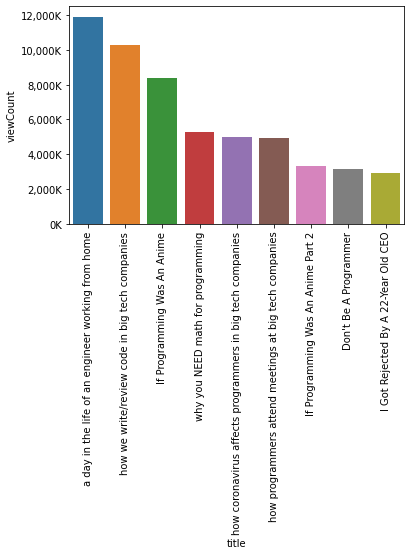

In [ ]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

Worst performing videos

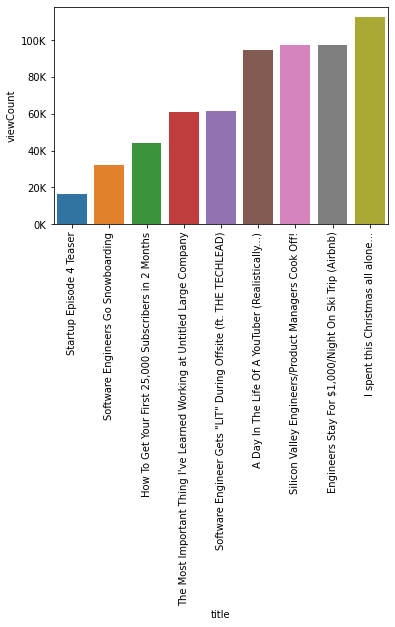

In [ ]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### View distribution per video

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


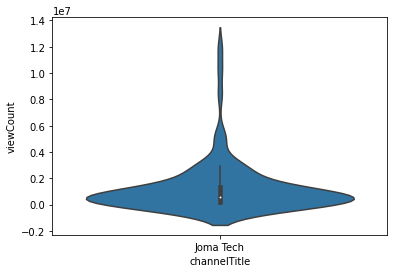

In [ ]:
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])

### Views vs. likes and comments

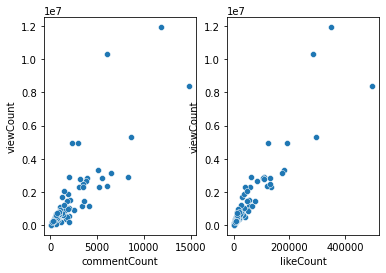

In [ ]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

### Video duration

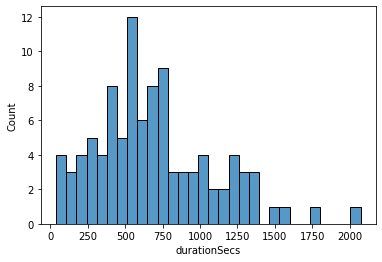

In [ ]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

### Wordcloud for video titles

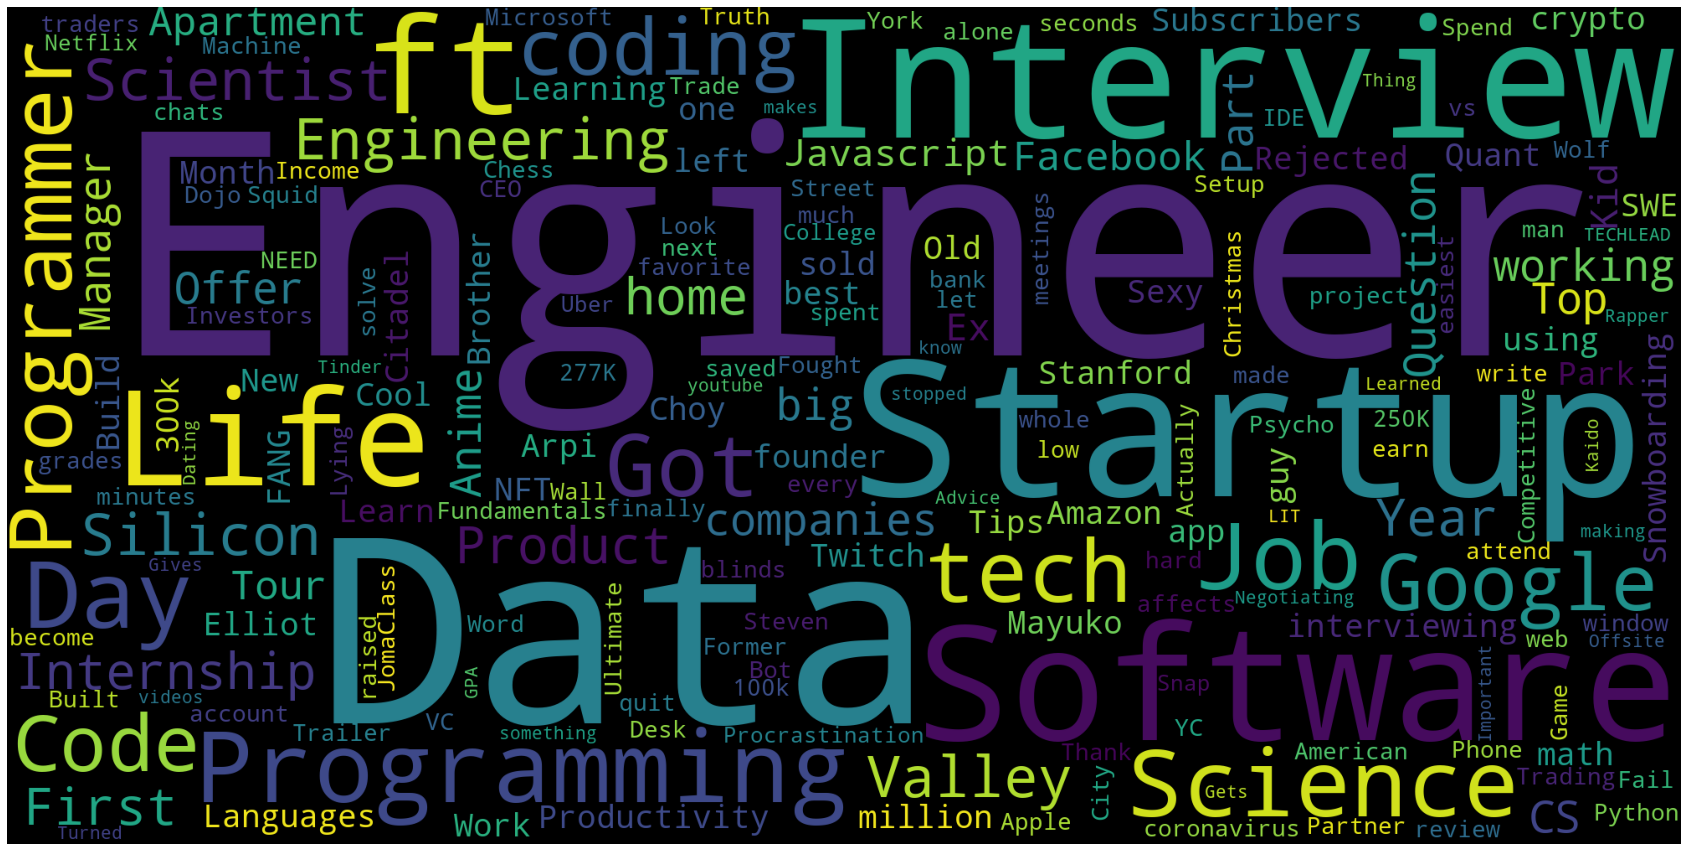

In [ ]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### Upload schedule

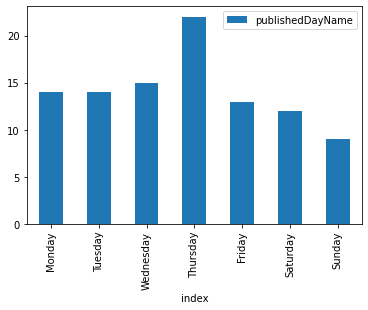

In [ ]:
day_df = pd.DataFrame(video_df['publishedDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishedDayName', rot=90)